# Test Development Notebook

### Imports

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

import lcanalyzer.models as models

### Params

In [13]:
bands = "ugrizy"
mag_col = "psfMag"
time_col = "expMidptMJD"

### Load the data

In [3]:
lc_datasets = {}
lc_datasets["lsst"] = pd.read_pickle("data/lsst_RRLyr.pkl")
lc_datasets["kepler"] = pd.read_csv("data/kepler_RRLyr.csv")

### Select a single light curve

In [9]:
lc_datasets["lsst"]

,band,ccdVisitId,coord_ra,coord_dec,objectId,psfFlux,psfFluxErr,psfMag,ccdVisitId2,band2,expMidptMJD,zeroPoint
0,y,1032263018,62.462569,-44.113360,1251384969897480052,-515.183603,1697.218490,NaN,1032263018,y,61100.069706,30.602301
1,y,1033987172,62.462569,-44.113360,1251384969897480052,3151.738459,1686.955775,22.653625,1033987172,y,61102.068464,30.606100
2,u,675163080,62.462569,-44.113360,1251384969897480052,183.449123,209.242045,25.741211,675163080,u,60582.247144,30.469101
3,y,443055067,62.462569,-44.113360,1251384969897480052,-704.848327,1624.400086,NaN,443055067,y,60215.203585,30.612801
4,u,466722002,62.462569,-44.113360,1251384969897480052,382.472233,278.926670,24.943500,466722002,u,60261.078221,30.461201
...,...,...,...,...,...,...,...,...,...,...,...,...
11172,i,428582024,66.267960,-27.741765,2185793931646635508,544023.409292,922.343038,17.060956,428582024,i,60193.365488,31.846800
11173,i,1173720158,66.267960,-27.741765,2185793931646635508,393272.358975,768.388803,17.413266,1173720158,i,61305.324734,31.849400
11174,i,1173719142,66.267960,-27.741765,2185793931646635508,342286.052877,720.070098,17.564027,1173719142,i,61305.324286,31.846701
11175,i,238057099,66.267960,-27.741765,2185793931646635508,547265.490786,910.999082,17.054505,238057099,i,59908.119769,31.843300


In [ ]:
bands = "ugrizy"

In [27]:
# Create an empty list where we will be storing our light curves
lcs = []
# For each observed object
for obj_id in lc_datasets["lsst"]["objectId"].unique():
    # Create an empty dict for the light curves of this object
    lc = {}
    lc["objectId"] = obj_id
    for b in bands:
        filt_band_obj = (lc_datasets["lsst"]["objectId"] == obj_id) & (
            lc_datasets["lsst"]["band"] == b
        )
        # The observations in each band are converted to lists and stored as dict elements
        lc[b + "_" + mag_col] = np.array(lc_datasets["lsst"][filt_band_obj][mag_col])
        lc[b + "_" + time_col] = np.array(lc_datasets["lsst"][filt_band_obj][time_col])
    lcs.append(lc)
# Turn the list of dicts into a DataFrame
lcs = pd.DataFrame.from_records(lcs)

In [34]:
lcs["u_psfMag_cleaned", ["u_psfMag_cleaned"]] = lcs.apply(
    lambda l: l["u_psfMag"][~np.isnan(l["u_psfMag"])], axis=1
)

array([0, 0, 0])

In [45]:
b = "u"
lcs[b + "_" + mag_col + "_cleaned"] = lcs[b + "_" + mag_col].map(
    lambda l: np.where(np.isnan(l), 0, l)
)

In [49]:
b = "u"
mcol = b + "_" + mag_col
tcol = b + "_" + time_col
mcol_cl = mcol + "_cleaned"
tcol_cl = tcol + "_cleaned"
lcs[[mcol_cl, tcol_cl]] = lcs.apply(
    lambda l: (
        l[mcol][~np.isnan(l[mcol])],
        l[tcol][~np.isnan(l[mcol])],
    ),
    axis=1,
    result_type="expand",
)

In [56]:
lcs[mcol]

0     [25.741210900246656, 24.94350022063739, nan, n...
1     [20.138613608325954, 20.08687354418428, 20.595...
2     [18.801602946353793, 18.798748054955016, 18.80...
3     [20.40735200568554, 20.393038732827815, 20.388...
4     [20.83041876435392, 20.99746357451392, 20.3530...
5     [20.25341799399802, 20.254002025419684, 20.252...
6     [20.64636943563218, 20.425349592686068, 20.948...
7     [19.404254599242083, 20.261958684398444, 20.31...
8     [21.23835932951451, 21.08540308502575, 21.2483...
9     [21.693097371323958, 20.812380837184147, 20.86...
10    [20.12085912008535, 19.37735442480281, 20.1584...
11    [20.18502543612132, 20.22834692941896, 20.1975...
12    [20.14716397622808, 19.927608648922437, 20.314...
13    [21.200378154531695, 21.2190403669264, 21.1956...
14    [22.292053352569148, 22.3234684645578, 21.7890...
15    [21.748107650663336, 22.43246686396091, 21.726...
16    [22.097761351324216, 21.988389011787593, 22.00...
17    [20.287145316884303, 20.2902212003806, 20.

In [61]:
len(lcs[tcol_cl].iloc[0])

24

In [62]:
len(lcs[mcol_cl].iloc[0])

24

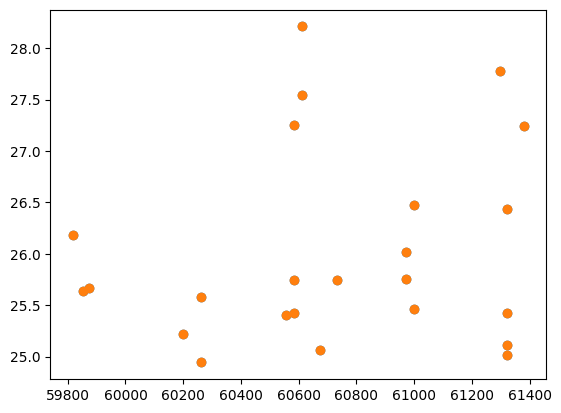

In [54]:
i = 1
plt.scatter(lcs[tcol].iloc[i],lcs[mcol].iloc[i])
plt.scatter(lcs[tcol_cl].iloc[i],lcs[mcol_cl].iloc[i])

In [102]:
# max_tab_by_groupby = lc_datasets["lsst"].groupby(["objectId", "band"])["psfMag"].max()
# max_tab_by_groupby.reset_index()

In [37]:
import time


def profile(func):
    def inner(*args, **kwargs):
        start = time.process_time_ns()
        result = func(*args, **kwargs)
        stop = time.process_time_ns()

        print("Took {0} seconds".format((stop - start) / 1e9))
        return result

    return inner

In [38]:
@profile
def measure_me(n):
    total = 0
    for i in range(n):
        total += i * i

    return total


print(measure_me(1000000))

Took 0.066366822 seconds
333332833333500000


In [63]:
data = pd.DataFrame(data = [[1., 2., 3.],
                            [4., 5., 6.]],
                    columns = list('abc'))